# TensorFlow Classification Code

We will be using UCI ML Breast Cancer Wisconsin (Diagnostic) datasets (https://goo.gl/U2Uwz2).

It's a great dataset for evaluating binary classification model.    

## 1- Importing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

## 2- Reading the data

In [2]:
df=pd.read_csv('cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.shape

(569, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

As there is no null value in the data, there is no need to data cleaning

In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## 3- EDA and Visualization

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

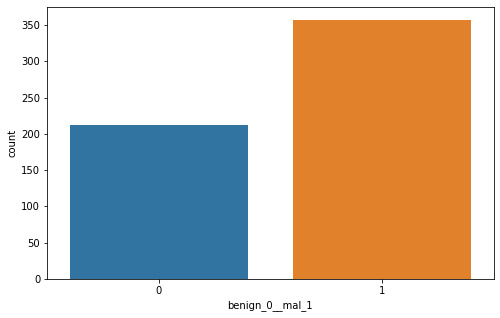

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(x='benign_0__mal_1',data=df)

We have more cases of malignent tumors in this dataset.

C:\Users\Soha\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, 'Correlation with cancer type')

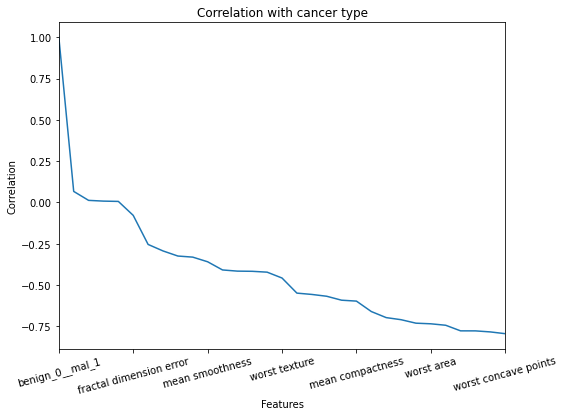

In [25]:
plt.figure(figsize=(8,6))
df.corr()['benign_0__mal_1'].sort_values(ascending=False).plot(kind='line')
plt.xticks(rotation=15)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation with cancer type')

We will drop the label which is perfectly correlated at 1 in a barplot.

Text(0.5, 1.0, 'Correlation with cancer type')

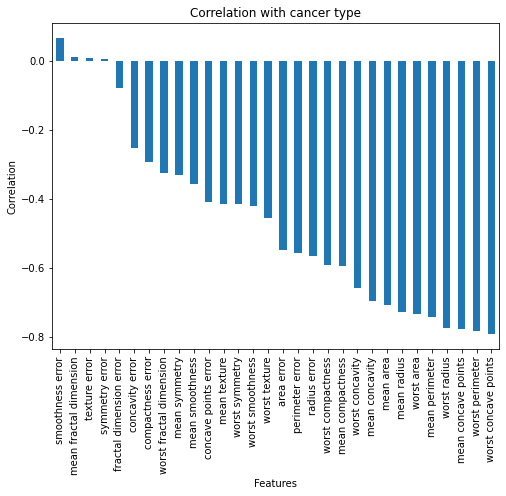

In [28]:
plt.figure(figsize=(8,6))
df.corr()['benign_0__mal_1'].sort_values(ascending=False).drop('benign_0__mal_1').plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.title('Correlation with cancer type')

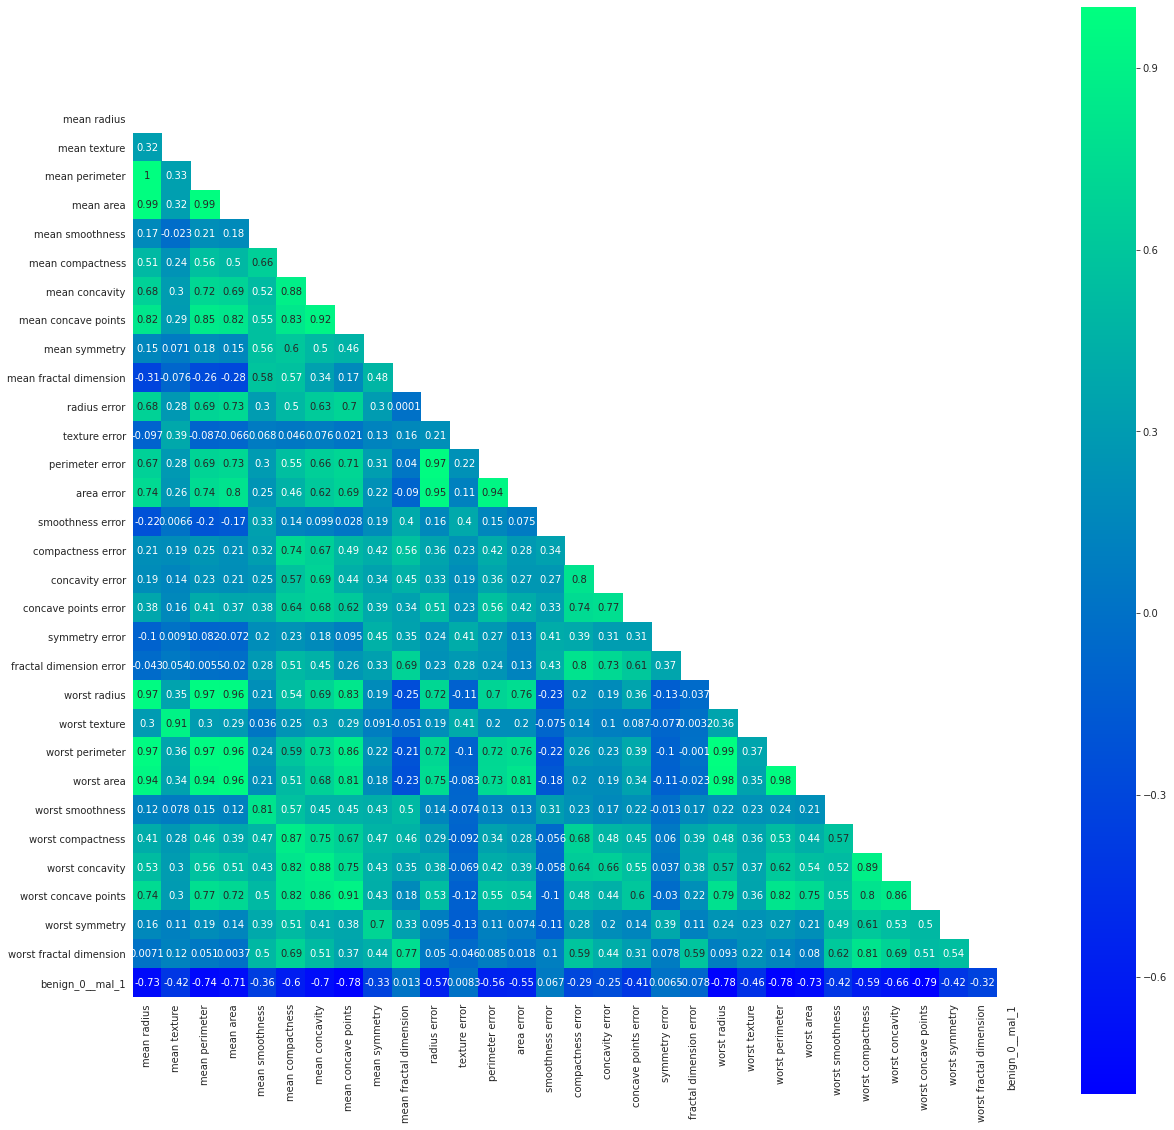

In [27]:
plt.figure(figsize=(20,20))
corr=df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True, annot=True, cmap='winter')

## 4- Splitting the Data

In [18]:
X=df.drop(['benign_0__mal_1'], axis=1).values
y=df['benign_0__mal_1'].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## 5- Scaling

In [20]:
mms=MinMaxScaler()

In [21]:
mms.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [22]:
X_train=mms.transform(X_train)

In [23]:
X_test=mms.transform(X_test)

In the next step, we choose too many epochs and we use try and error to avoid overfitting and determine the optimal model for prediction, in three trials.

# First-No Early Stopping- No Droupout Layer

## 6- Creating the Model

In [200]:
model= Sequential()

model.add(Dense(30,activation='relu'))
          
model.add(Dense(30,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

## 7- Training the model

In [201]:
model.fit(X_train,y_train,epochs=600, validation_data=(X_test,y_test),batch_size=128)

Epoch 1/600
4/4 [==============================] - 0s 27ms/step - loss: 0.6957 - val_loss: 0.6895
Epoch 2/600
4/4 [==============================] - 0s 7ms/step - loss: 0.6792 - val_loss: 0.6729
Epoch 3/600
4/4 [==============================] - 0s 7ms/step - loss: 0.6636 - val_loss: 0.6592
Epoch 4/600
4/4 [==============================] - 0s 7ms/step - loss: 0.6503 - val_loss: 0.6467
Epoch 5/600
4/4 [==============================] - 0s 7ms/step - loss: 0.6380 - val_loss: 0.6340
Epoch 6/600
4/4 [==============================] - 0s 7ms/step - loss: 0.6247 - val_loss: 0.6205
Epoch 7/600
4/4 [==============================] - 0s 7ms/step - loss: 0.6108 - val_loss: 0.6057
Epoch 8/600
4/4 [==============================] - 0s 8ms/step - loss: 0.5953 - val_loss: 0.5896
Epoch 9/600
4/4 [==============================] - 0s 8ms/step - loss: 0.5788 - val_loss: 0.5723
Epoch 10/600
4/4 [==============================] - 0s 7ms/step - loss: 0.5615 - val_loss: 0.5541
Epoch 11/600
4/4 [==========

4/4 [==============================] - 0s 7ms/step - loss: 0.0512 - val_loss: 0.1116
Epoch 167/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0519 - val_loss: 0.1112
Epoch 168/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0511 - val_loss: 0.1059
Epoch 169/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0524 - val_loss: 0.1036
Epoch 170/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0511 - val_loss: 0.1174
Epoch 171/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0528 - val_loss: 0.1169
Epoch 172/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0511 - val_loss: 0.1064
Epoch 173/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0511 - val_loss: 0.1024
Epoch 174/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0517 - val_loss: 0.1084
Epoch 175/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0502 - val_loss: 0.1088
Epoch 176/600
4/4 [=====

Epoch 249/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0422 - val_loss: 0.1173
Epoch 250/600
4/4 [==============================] - 0s 8ms/step - loss: 0.0438 - val_loss: 0.1209
Epoch 251/600
4/4 [==============================] - 0s 8ms/step - loss: 0.0416 - val_loss: 0.1124
Epoch 252/600
4/4 [==============================] - 0s 9ms/step - loss: 0.0437 - val_loss: 0.1077
Epoch 253/600
4/4 [==============================] - 0s 9ms/step - loss: 0.0443 - val_loss: 0.1112
Epoch 254/600
4/4 [==============================] - 0s 9ms/step - loss: 0.0420 - val_loss: 0.1156
Epoch 255/600
4/4 [==============================] - 0s 10ms/step - loss: 0.0416 - val_loss: 0.1176
Epoch 256/600
4/4 [==============================] - 0s 9ms/step - loss: 0.0415 - val_loss: 0.1126
Epoch 257/600
4/4 [==============================] - 0s 10ms/step - loss: 0.0422 - val_loss: 0.1114
Epoch 258/600
4/4 [==============================] - 0s 12ms/step - loss: 0.0421 - val_loss: 0.1148
Epoch 2

4/4 [==============================] - 0s 6ms/step - loss: 0.0292 - val_loss: 0.1281
Epoch 414/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0338 - val_loss: 0.1261
Epoch 415/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0302 - val_loss: 0.1470
Epoch 416/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0306 - val_loss: 0.1568
Epoch 417/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0297 - val_loss: 0.1359
Epoch 418/600
4/4 [==============================] - 0s 8ms/step - loss: 0.0296 - val_loss: 0.1353
Epoch 419/600
4/4 [==============================] - 0s 8ms/step - loss: 0.0298 - val_loss: 0.1501
Epoch 420/600
4/4 [==============================] - 0s 8ms/step - loss: 0.0294 - val_loss: 0.1442
Epoch 421/600
4/4 [==============================] - 0s 8ms/step - loss: 0.0282 - val_loss: 0.1430
Epoch 422/600
4/4 [==============================] - 0s 8ms/step - loss: 0.0280 - val_loss: 0.1384
Epoch 423/600
4/4 [=====

Epoch 578/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0188 - val_loss: 0.1668
Epoch 579/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0177 - val_loss: 0.1597
Epoch 580/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0181 - val_loss: 0.1611
Epoch 581/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0179 - val_loss: 0.1674
Epoch 582/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0184 - val_loss: 0.1632
Epoch 583/600
4/4 [==============================] - 0s 8ms/step - loss: 0.0185 - val_loss: 0.1673
Epoch 584/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0181 - val_loss: 0.1572
Epoch 585/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0177 - val_loss: 0.1648
Epoch 586/600
4/4 [==============================] - 0s 6ms/step - loss: 0.0174 - val_loss: 0.1684
Epoch 587/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0183 - val_loss: 0.1740
Epoch 588/

## 8- Evaluation

#### 8-1-Training Loss per Epoch

In [202]:
first_loss_df=pd.DataFrame(model.history.history)

In [203]:
first_loss_df

,loss,val_loss
0,0.695674,0.689522
1,0.679183,0.672946
2,0.663581,0.659167
3,0.650295,0.646748
4,0.638008,0.634036
...,...,...
595,0.018591,0.168222
596,0.016716,0.175599
597,0.017466,0.172446
598,0.017473,0.163928


Text(0.5, 1.0, 'Training Loss per Epoch')

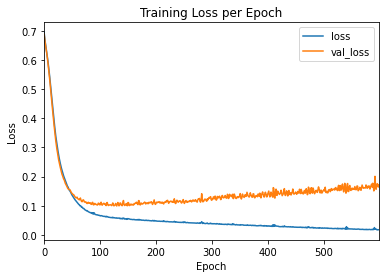

In [204]:
first_loss_df.plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')

#### 8-2- Further Evaluations (confusion_matrix, classification_report)

In [205]:
predictions=model.predict_classes(X_test)

In [206]:
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print('Accuracy Score:',accuracy_score(y_test,predictions)*100)

[[54  1]
 [ 4 84]]


              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



Accuracy Score: 96.5034965034965


# Second- Early Stopping- No Droupout Layer

## 6- Creating the Model

In [207]:
model= Sequential()

model.add(Dense(30,activation='relu'))
          
model.add(Dense(30,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

## 7- Training the model

In [208]:
es=EarlyStopping(monitor='val_loss', mode='min',patience=25,verbose=1)

In [209]:
model.fit(X_train,y_train,epochs=600, validation_data=(X_test,y_test),batch_size=128, callbacks=[es])

Epoch 1/600
4/4 [==============================] - 0s 30ms/step - loss: 0.6873 - val_loss: 0.6776
Epoch 2/600
4/4 [==============================] - 0s 7ms/step - loss: 0.6714 - val_loss: 0.6616
Epoch 3/600
4/4 [==============================] - 0s 7ms/step - loss: 0.6554 - val_loss: 0.6452
Epoch 4/600
4/4 [==============================] - 0s 7ms/step - loss: 0.6389 - val_loss: 0.6286
Epoch 5/600
4/4 [==============================] - 0s 10ms/step - loss: 0.6227 - val_loss: 0.6122
Epoch 6/600
4/4 [==============================] - 0s 7ms/step - loss: 0.6067 - val_loss: 0.5952
Epoch 7/600
4/4 [==============================] - 0s 7ms/step - loss: 0.5901 - val_loss: 0.5774
Epoch 8/600
4/4 [==============================] - 0s 7ms/step - loss: 0.5722 - val_loss: 0.5582
Epoch 9/600
4/4 [==============================] - 0s 7ms/step - loss: 0.5533 - val_loss: 0.5376
Epoch 10/600
4/4 [==============================] - 0s 8ms/step - loss: 0.5325 - val_loss: 0.5159
Epoch 11/600
4/4 [=========

Epoch 84/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0711 - val_loss: 0.1113
Epoch 85/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0711 - val_loss: 0.1141
Epoch 86/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0695 - val_loss: 0.1106
Epoch 87/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0695 - val_loss: 0.1095
Epoch 88/600
4/4 [==============================] - 0s 7ms/step - loss: 0.0688 - val_loss: 0.1144
Epoch 89/600
4/4 [==============================] - 0s 8ms/step - loss: 0.0679 - val_loss: 0.1131
Epoch 90/600
4/4 [==============================] - 0s 9ms/step - loss: 0.0670 - val_loss: 0.1087
Epoch 91/600
4/4 [==============================] - 0s 10ms/step - loss: 0.0670 - val_loss: 0.1099
Epoch 92/600
4/4 [==============================] - 0s 11ms/step - loss: 0.0658 - val_loss: 0.1159
Epoch 93/600
4/4 [==============================] - 0s 11ms/step - loss: 0.0668 - val_loss: 0.1166
Epoch 94/600
4/4 

## 8- Evaluation

#### 8-1-Training Loss per Epoch

In [210]:
second_loss_df=pd.DataFrame(model.history.history)

In [211]:
second_loss_df

,loss,val_loss
0,0.687313,0.677582
1,0.671402,0.661616
2,0.655357,0.645176
3,0.638904,0.628626
4,0.622678,0.612176
...,...,...
115,0.056071,0.112214
116,0.056202,0.115694
117,0.055303,0.112257
118,0.055548,0.110220


Text(0.5, 1.0, 'Training Loss per Epoch')

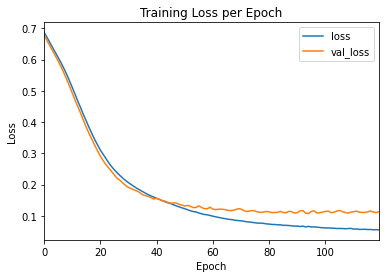

In [212]:
second_loss_df.plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')

#### 8-2- Further Evaluations (confusion_matrix, classification_report,accuracy_score)

In [213]:
predictions=model.predict_classes(X_test)

In [214]:
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print('Accuracy Score:',accuracy_score(y_test,predictions)*100)

[[53  2]
 [ 2 86]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        55
           1       0.98      0.98      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



Accuracy Score: 97.2027972027972


# Third- Early Stopping- Droupout Layer

## 6- Creating the Model

In [224]:
model= Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
          
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

## 7- Training the model

In [225]:
es=EarlyStopping(monitor='val_loss', mode='min',patience=25,verbose=1)

In [226]:
model.fit(X_train,y_train,epochs=600, validation_data=(X_test,y_test),batch_size=128, callbacks=[es])

Epoch 1/600
4/4 [==============================] - 0s 28ms/step - loss: 0.7182 - val_loss: 0.6990
Epoch 2/600
4/4 [==============================] - 0s 7ms/step - loss: 0.6995 - val_loss: 0.6902
Epoch 3/600
4/4 [==============================] - 0s 8ms/step - loss: 0.6951 - val_loss: 0.6819
Epoch 4/600
4/4 [==============================] - 0s 8ms/step - loss: 0.6856 - val_loss: 0.6743
Epoch 5/600
4/4 [==============================] - 0s 8ms/step - loss: 0.6794 - val_loss: 0.6674
Epoch 6/600
4/4 [==============================] - 0s 9ms/step - loss: 0.6763 - val_loss: 0.6602
Epoch 7/600
4/4 [==============================] - 0s 7ms/step - loss: 0.6600 - val_loss: 0.6520
Epoch 8/600
4/4 [==============================] - 0s 8ms/step - loss: 0.6584 - val_loss: 0.6437
Epoch 9/600
4/4 [==============================] - 0s 7ms/step - loss: 0.6526 - val_loss: 0.6348
Epoch 10/600
4/4 [==============================] - 0s 7ms/step - loss: 0.6251 - val_loss: 0.6247
Epoch 11/600
4/4 [==========

Epoch 167/600
4/4 [==============================] - 0s 8ms/step - loss: 0.1047 - val_loss: 0.0916
Epoch 168/600
4/4 [==============================] - 0s 8ms/step - loss: 0.0973 - val_loss: 0.0908
Epoch 169/600
4/4 [==============================] - 0s 8ms/step - loss: 0.0877 - val_loss: 0.0864
Epoch 170/600
4/4 [==============================] - 0s 8ms/step - loss: 0.0873 - val_loss: 0.0841
Epoch 171/600
4/4 [==============================] - 0s 8ms/step - loss: 0.0871 - val_loss: 0.0795
Epoch 172/600
4/4 [==============================] - 0s 9ms/step - loss: 0.0895 - val_loss: 0.0775
Epoch 173/600
4/4 [==============================] - 0s 9ms/step - loss: 0.0903 - val_loss: 0.0783
Epoch 174/600
4/4 [==============================] - 0s 9ms/step - loss: 0.1017 - val_loss: 0.0810
Epoch 175/600
4/4 [==============================] - 0s 9ms/step - loss: 0.0808 - val_loss: 0.0863
Epoch 176/600
4/4 [==============================] - 0s 9ms/step - loss: 0.0964 - val_loss: 0.0872
Epoch 177/

## 8- Evaluation

#### 8-1-Training Loss per Epoch

In [227]:
third_loss_df=pd.DataFrame(model.history.history)

In [228]:
third_loss_df

,loss,val_loss
0,0.718208,0.699014
1,0.699459,0.690170
2,0.695104,0.681907
3,0.685618,0.674320
4,0.679373,0.667410
...,...,...
201,0.071101,0.085222
202,0.071286,0.084730
203,0.078611,0.081131
204,0.103676,0.078272


Text(0.5, 1.0, 'Training Loss per Epoch')

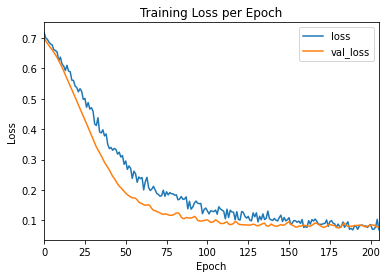

In [229]:
third_loss_df.plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')

#### 8-2- Further Evaluations (confusion_matrix, classification_report,accuracy_score)

In [230]:
predictions=model.predict_classes(X_test)

In [231]:
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print('Accuracy Score:',accuracy_score(y_test,predictions)*100)

[[54  1]
 [ 2 86]]


              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



Accuracy Score: 97.9020979020979
